In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

In [2]:
tickers = ["4300.SR", "1150.SR", "4190.SR", "2020.SR"]
multpl_stocks = web.get_data_yahoo(tickers,
start = "2020-11-07",
end = "2021-11-07")

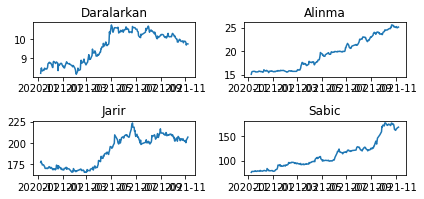

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax1.plot(multpl_stocks['Adj Close']['4300.SR'])
ax1.set_title("Daralarkan")
ax2.plot(multpl_stocks['Adj Close']['1150.SR'])
ax2.set_title("Alinma")
ax3.plot(multpl_stocks['Adj Close']['4190.SR'])
ax3.set_title("Jarir")
ax4.plot(multpl_stocks['Adj Close']['2020.SR'])
ax4.set_title("Sabic")
plt.tight_layout()
plt.show()

In [4]:
multpl_stock_daily_returns = multpl_stocks['Adj Close'].pct_change()
multpl_stock_monthly_returns = multpl_stocks['Adj Close'].resample('M').ffill().pct_change()

<Figure size 432x288 with 0 Axes>

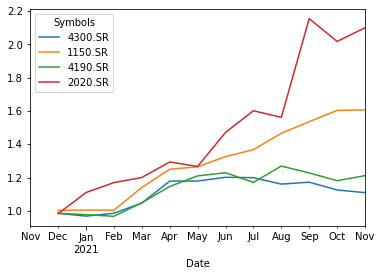

In [5]:
fig = plt.figure()
(multpl_stock_monthly_returns + 1).cumprod().plot()
plt.show()

In [6]:
print(multpl_stock_monthly_returns.mean())

Symbols
4300.SR    0.009579
1150.SR    0.041059
4190.SR    0.017249
2020.SR    0.069210
dtype: float64


In [7]:
print(multpl_stock_monthly_returns.std())

Symbols
4300.SR    0.045539
1150.SR    0.043042
4190.SR    0.050757
2020.SR    0.118260
dtype: float64


In [8]:
print(multpl_stock_monthly_returns.corr())

Symbols   4300.SR   1150.SR   4190.SR   2020.SR
Symbols                                        
4300.SR  1.000000  0.606466  0.540473  0.200458
1150.SR  0.606466  1.000000  0.608045  0.023801
4190.SR  0.540473  0.608045  1.000000 -0.301020
2020.SR  0.200458  0.023801 -0.301020  1.000000


In [9]:
multpl_stock_monthly_returns = multpl_stock_monthly_returns.dropna()
matrix_of_return_values = multpl_stock_monthly_returns.to_numpy()
matrix_of_return_values = np.asmatrix(matrix_of_return_values)
matrix_of_return_values = matrix_of_return_values.T
print(matrix_of_return_values)

[[-0.01478955 -0.01732097  0.01762628  0.06235565  0.12608694  0.
   0.01930509 -0.00189398 -0.03225808  0.00980396 -0.03980581 -0.01415575]
 [ 0.0024783   0.00247218 -0.00123298  0.1358024   0.09641345  0.01108866
   0.0488535   0.03136878  0.07167885  0.04803495  0.04374997  0.00199605]
 [-0.01477271 -0.00807386 -0.01046508  0.08405588  0.09340654  0.05527649
   0.01587295 -0.04734851  0.08373144 -0.03231764 -0.03816794  0.02579363]
 [-0.01707315  0.12903226  0.05384615  0.02606883  0.07780824 -0.02095234
   0.16147862  0.08844693 -0.02488339  0.37958531 -0.06358382  0.04074078]]


In [10]:
no_of_asset_classes = 4

In [11]:
no_of_portfolios = 10000

In [12]:
collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

In [13]:
def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights /= sum(random_asset_weights)
    random_asset_weights = np.asmatrix(random_asset_weights)
    return random_asset_weights

In [14]:
def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    asset_covariances = np.asmatrix(np.cov(matrix_of_return_values))
    portfolio_mean = asset_weights * asset_means
    print(portfolio_mean)
    print(asset_means)
    portfolio_mean = portfolio_mean.item()
    portfolio_standard_deviation = np.sqrt(asset_weights * asset_covariances * asset_weights.T)
    portfolio_standard_deviation = portfolio_standard_deviation.item()
    portfolio_sharpe_ratio = portfolio_mean / portfolio_standard_deviation
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio

In [15]:
while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights)
    a, b, c = get_portfolio_statistics(random_asset_weights, matrix_of_return_values)
    portfolio_means.append(a)
    portfolio_standard_deviations.append(b)
    portfolio_sharpe_ratios.append(c)

[[0.03734979]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03849207]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03547367]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0338905]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03431826]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04624797]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03355555]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04637969]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02848194]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03415879]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03516259]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02711293]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03689251]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03401677]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.0692

[[0.04393721]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0261281]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02893042]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04076592]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04106604]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02869788]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03780217]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03104905]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02771045]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03675823]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0392122]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03957684]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04122405]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03544755]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920

[[0.02606565]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04151544]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03009142]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04457913]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04226217]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03336952]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0386064]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.01702564]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0229495]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.05351077]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03475268]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03780014]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04456881]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03552983]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920

[[0.03222347]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02896263]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03947661]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02966232]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04990378]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0445189]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03611533]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0340177]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03580326]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02741025]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03244506]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04654079]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.01941439]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03725066]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920

[[0.04878772]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0291598]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03869491]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03201728]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04742207]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04006576]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03355346]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03717803]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03580257]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03270371]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.01816554]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04350711]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0285471]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02732797]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920

[[0.04282122]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.05030512]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03493368]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0404006]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03316455]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03688038]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0383984]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02929406]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02969669]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03913772]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04144939]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02778016]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03260165]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03373159]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920

[[0.04202363]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04591267]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0240744]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03890136]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02797493]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02569092]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02582317]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02361421]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03353803]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02815926]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03812711]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03923253]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02054595]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03608877]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.0692

[[0.05104637]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02408678]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03202547]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03311296]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04117017]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02328184]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03147444]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02588133]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0254532]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03086529]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03947829]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04803371]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0297049]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03504225]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920

[[0.03135901]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04806354]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02762267]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03361634]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0345041]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03676224]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03605709]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02152075]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03694408]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03944918]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04910627]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03880899]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02472208]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0423812]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920

[[0.02212009]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0327885]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03662378]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03553598]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03859289]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04869695]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04498583]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03199965]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02889189]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.05380299]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03925649]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04249735]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03058279]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03347032]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.0692

[[0.02086766]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0441252]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03383573]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02392386]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03534729]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0227583]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03138973]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04103844]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03289151]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03331108]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03279568]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03431675]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03398343]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03510762]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920

[[0.02965082]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03682477]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03502173]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03256944]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03351206]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03067059]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02513956]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04160012]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03446804]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03708595]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04467632]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04939128]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0418701]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02401416]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.0692

[[0.04420376]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.021782]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03367749]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04114518]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03431626]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02913574]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04868172]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03333457]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02256371]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03871907]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03037061]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03635299]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0363793]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02885094]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.069209

[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.05335512]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03022946]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04132617]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0194472]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.01823985]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04360812]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03502395]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03262621]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02222234]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04789081]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03661477]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0457779]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0272912]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.031300

[[0.02598927]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04071012]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02195205]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03193183]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03554713]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03442588]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03954251]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03867375]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02760345]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03623937]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03376063]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03832235]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03416632]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04270279]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.069

[[0.02963219]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03584603]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03386001]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04559724]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03981811]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03150256]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03093225]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03309689]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0318688]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02775496]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02182716]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03581959]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02543071]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.01913339]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.0692

[[0.03577711]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02511495]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04621696]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04092659]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02209143]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03920824]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03171574]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04692636]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03791453]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03296033]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02469919]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04056884]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03310589]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02756977]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.069

[[0.04254053]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03722726]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02356959]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03387774]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03449192]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03130109]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03086962]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03941766]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04009742]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02141346]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0360609]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04438602]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02417564]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.01678129]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.0692

 [0.06920953]]
[[0.02681875]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03444829]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03487464]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04015666]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03864444]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03617396]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04205022]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02506106]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03029439]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03221161]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04070826]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04082721]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02754361]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04429969]]
[[0.00957948]
 [0.04105868]
 [0.01

[[0.02422966]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03586635]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03514478]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02358353]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02685281]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02030259]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03037067]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03440495]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03396901]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03045979]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02361858]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03318629]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02643634]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03146294]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.069

[[0.02481806]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03783844]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04196625]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0380519]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03324229]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0202901]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02915721]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03881374]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03237722]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03370224]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02199332]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03919648]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03984384]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03348653]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920

[[0.03684507]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02984648]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02899225]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03084614]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03838605]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03175605]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03374676]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04112692]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04143699]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04228917]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02760312]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0258008]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03349524]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02473441]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.0692

[[0.03080158]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04351091]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04322861]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03562914]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0297677]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0363588]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04140888]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03725849]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04045708]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03020489]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02617353]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04020328]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03257469]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03598299]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920

[[0.02447679]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03953021]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03193187]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04380373]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04572434]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02616775]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03775193]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03558781]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02379949]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04720208]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03505619]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04186023]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03416117]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02387925]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.069

[[0.0364087]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03831268]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02663536]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02163307]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03705255]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03195285]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02889988]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02966668]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.05223237]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0342813]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03532545]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04516891]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03746359]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04736749]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920

[[0.03637156]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03751374]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03252923]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03740187]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03016653]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03714565]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03707224]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03585025]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03055048]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03089282]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04158775]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0472303]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02467354]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03464416]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.0692

[[0.02700774]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03621932]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03086523]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03210514]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02560379]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0197113]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04079964]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03251892]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04014207]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04219379]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03405921]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04807199]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02372587]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.05255065]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.0692

[[0.02986213]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03006325]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04390237]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04033651]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03233348]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04644818]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.05421963]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02590762]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03430616]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.05361914]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0339933]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03130399]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02560637]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03469876]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.0692

[[0.0263115]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02328801]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03024338]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0472839]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03631588]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02905527]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02614725]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.033035]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02999603]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03071692]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02692332]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03332064]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03874249]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04884041]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.0692095

[[0.02562351]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03137155]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.05688464]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03584626]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02685778]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03801364]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.01678647]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03243614]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03538271]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0296107]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04026718]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04463815]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03581536]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0319904]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920

[[0.04258659]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02744659]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02367291]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02499204]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02224889]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02167186]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04644699]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02615696]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02806568]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0209731]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03873443]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04158479]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03670634]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04326471]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.0692

[[0.05101002]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03521507]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03164026]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03060446]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04048878]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03389214]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.05112362]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03661379]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03771209]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02884198]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02932932]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0236242]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.048927]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02564411]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.069209

[[0.03687471]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0405742]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03476059]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04343935]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02421772]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03425639]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03055633]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03811857]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03378311]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03688264]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03420896]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03550806]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03653117]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03356718]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.0692

[[0.05489184]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03033295]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03710316]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03335073]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03918428]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03224653]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03598285]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04076374]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02198429]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04209046]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03559367]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03837853]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03413544]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03100258]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.069

[[0.03159835]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03434729]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03303487]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03841024]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03857987]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04154811]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0393586]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03536218]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03572295]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02579073]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0251683]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02263851]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03374035]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03122612]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920

[[0.0380213]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04663783]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03529318]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03883509]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02707095]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02932235]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03156182]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02321038]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03219078]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02740421]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03600298]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03181698]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02799613]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03078187]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.0692

[[0.02721456]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03361257]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0336876]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03567992]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.01721941]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03704188]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03387736]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03167647]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03161379]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03521126]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04363836]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.044793]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03414949]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02312709]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.069209

[[0.03588594]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03513029]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.05060544]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03253691]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03471979]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03538799]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03289281]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0244967]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04067853]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03832818]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03893115]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02845583]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02464527]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03290022]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.0692

[[0.04269815]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03774066]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04791891]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02824828]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03768613]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04261047]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03289152]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03581641]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03800717]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03672747]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.01953149]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03487497]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02703651]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04755105]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.069

[[0.0442363]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04752965]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03034937]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0264687]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03660707]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.036668]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0402454]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03593672]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03832047]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02967579]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.05347628]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04124888]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03544311]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03796166]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953

[[0.04011968]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.05208373]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03416131]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03416511]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04234057]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03992882]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04271163]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03603097]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04770572]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03358889]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04062891]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03208066]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03871798]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03118109]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.069

 [0.06920953]]
[[0.03453396]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04200246]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.01953468]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02016973]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03727659]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03227119]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0455603]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02170719]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02344235]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03536458]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04719312]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03177784]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04465239]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02856217]]
[[0.00957948]
 [0.04105868]
 [0.017

[[0.03159914]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03890469]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03756735]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.05015784]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03161751]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02852403]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02398364]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04597131]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03497833]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04105975]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0344383]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02889951]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03095351]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04531242]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.0692

[[0.04378964]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03106387]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03606472]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03867729]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04228435]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03618663]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03656676]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02789805]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02668104]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03076656]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.05019656]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02785087]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03715171]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03290002]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.069

[[0.0308542]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02455969]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03137485]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03823732]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02937793]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02988113]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03912615]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03015754]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03586974]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04799072]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03129885]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03344815]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02586675]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03519658]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.0692

 [0.06920953]]
[[0.03535091]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03291532]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02428912]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02954129]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03107127]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03433603]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04428418]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03644529]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02639989]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03931503]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0413673]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02563393]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03399993]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02757982]]
[[0.00957948]
 [0.04105868]
 [0.017

[[0.02602664]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04183472]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03067349]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02609612]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03964649]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03268978]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03739073]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03388298]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02209698]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04145309]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0363133]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0210021]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03993849]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03722536]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920

[[0.0308348]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03341663]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04080122]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0280748]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03051991]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04230238]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0158288]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.01670641]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03163697]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02394868]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02974025]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03262719]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03725992]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.05323754]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.069209

[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03299367]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03191202]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04563989]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03005241]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0365729]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04004529]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.0269149]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.05312856]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03641995]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03134905]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02599678]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.03955873]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.04358754]]
[[0.00957948]
 [0.04105868]
 [0.01724927]
 [0.06920953]]
[[0.02671

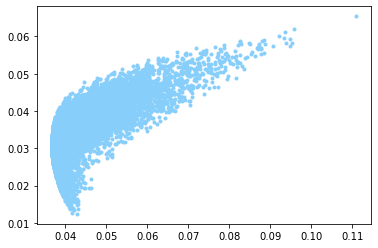

In [16]:
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue')
plt.show()

In [17]:
index = portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))

In [18]:
print(collection_of_random_asset_weights[index])
print(portfolio_sharpe_ratios[index])

[[0.01044532 0.72612395 0.0889205  0.17451023]]
1.0902613564232624


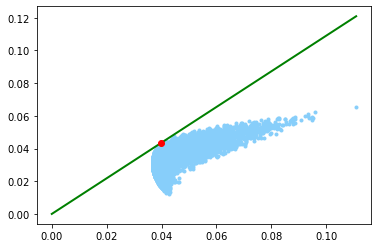

In [19]:
x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(x, y, '-', linewidth = 2, color = 'green')
plt.plot(portfolio_standard_deviations[index], portfolio_means[index], color= 'r', marker = 'o')
plt.show()

In [ ]:
[0.17451023, 0.72612395]Sabic, alinma